In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                             mean_squared_log_error, r2_score)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder, PolynomialFeatures, StandardScaler)

<p style="font-size: 26px">1. Preprocessing and Data analysis</p>

In [2]:
#making a dataframe from csv file
df = pd.read_csv('possum.csv', sep=',')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [4]:
#deleting enties with NA
df.dropna(inplace=True)
df.shape

(101, 14)

In [5]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,52.762376,3.673267,3.821782,92.730693,56.960396,87.269307,37.049505,68.398020,48.133663,15.050495,27.064356,32.638614
std,30.573894,2.366892,1.915182,3.518714,3.102679,4.196802,1.971681,4.413502,4.060352,1.058643,2.020722,2.727745
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,41.300000,12.800000,22.000000,25.000000
25%,26.000000,1.000000,2.000000,90.700000,55.000000,84.500000,36.000000,64.500000,44.800000,14.400000,25.500000,31.000000
50%,54.000000,4.000000,3.000000,92.900000,56.400000,88.000000,37.000000,67.900000,46.800000,14.900000,27.000000,32.500000
75%,79.000000,6.000000,5.000000,94.800000,58.100000,90.000000,38.000000,72.500000,52.000000,15.700000,28.000000,34.000000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [6]:
print(df.columns)

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')


In [7]:
#splitting column types into categories
numerical = ['site', 'case','age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']

categorical = ['Pop', 'sex']

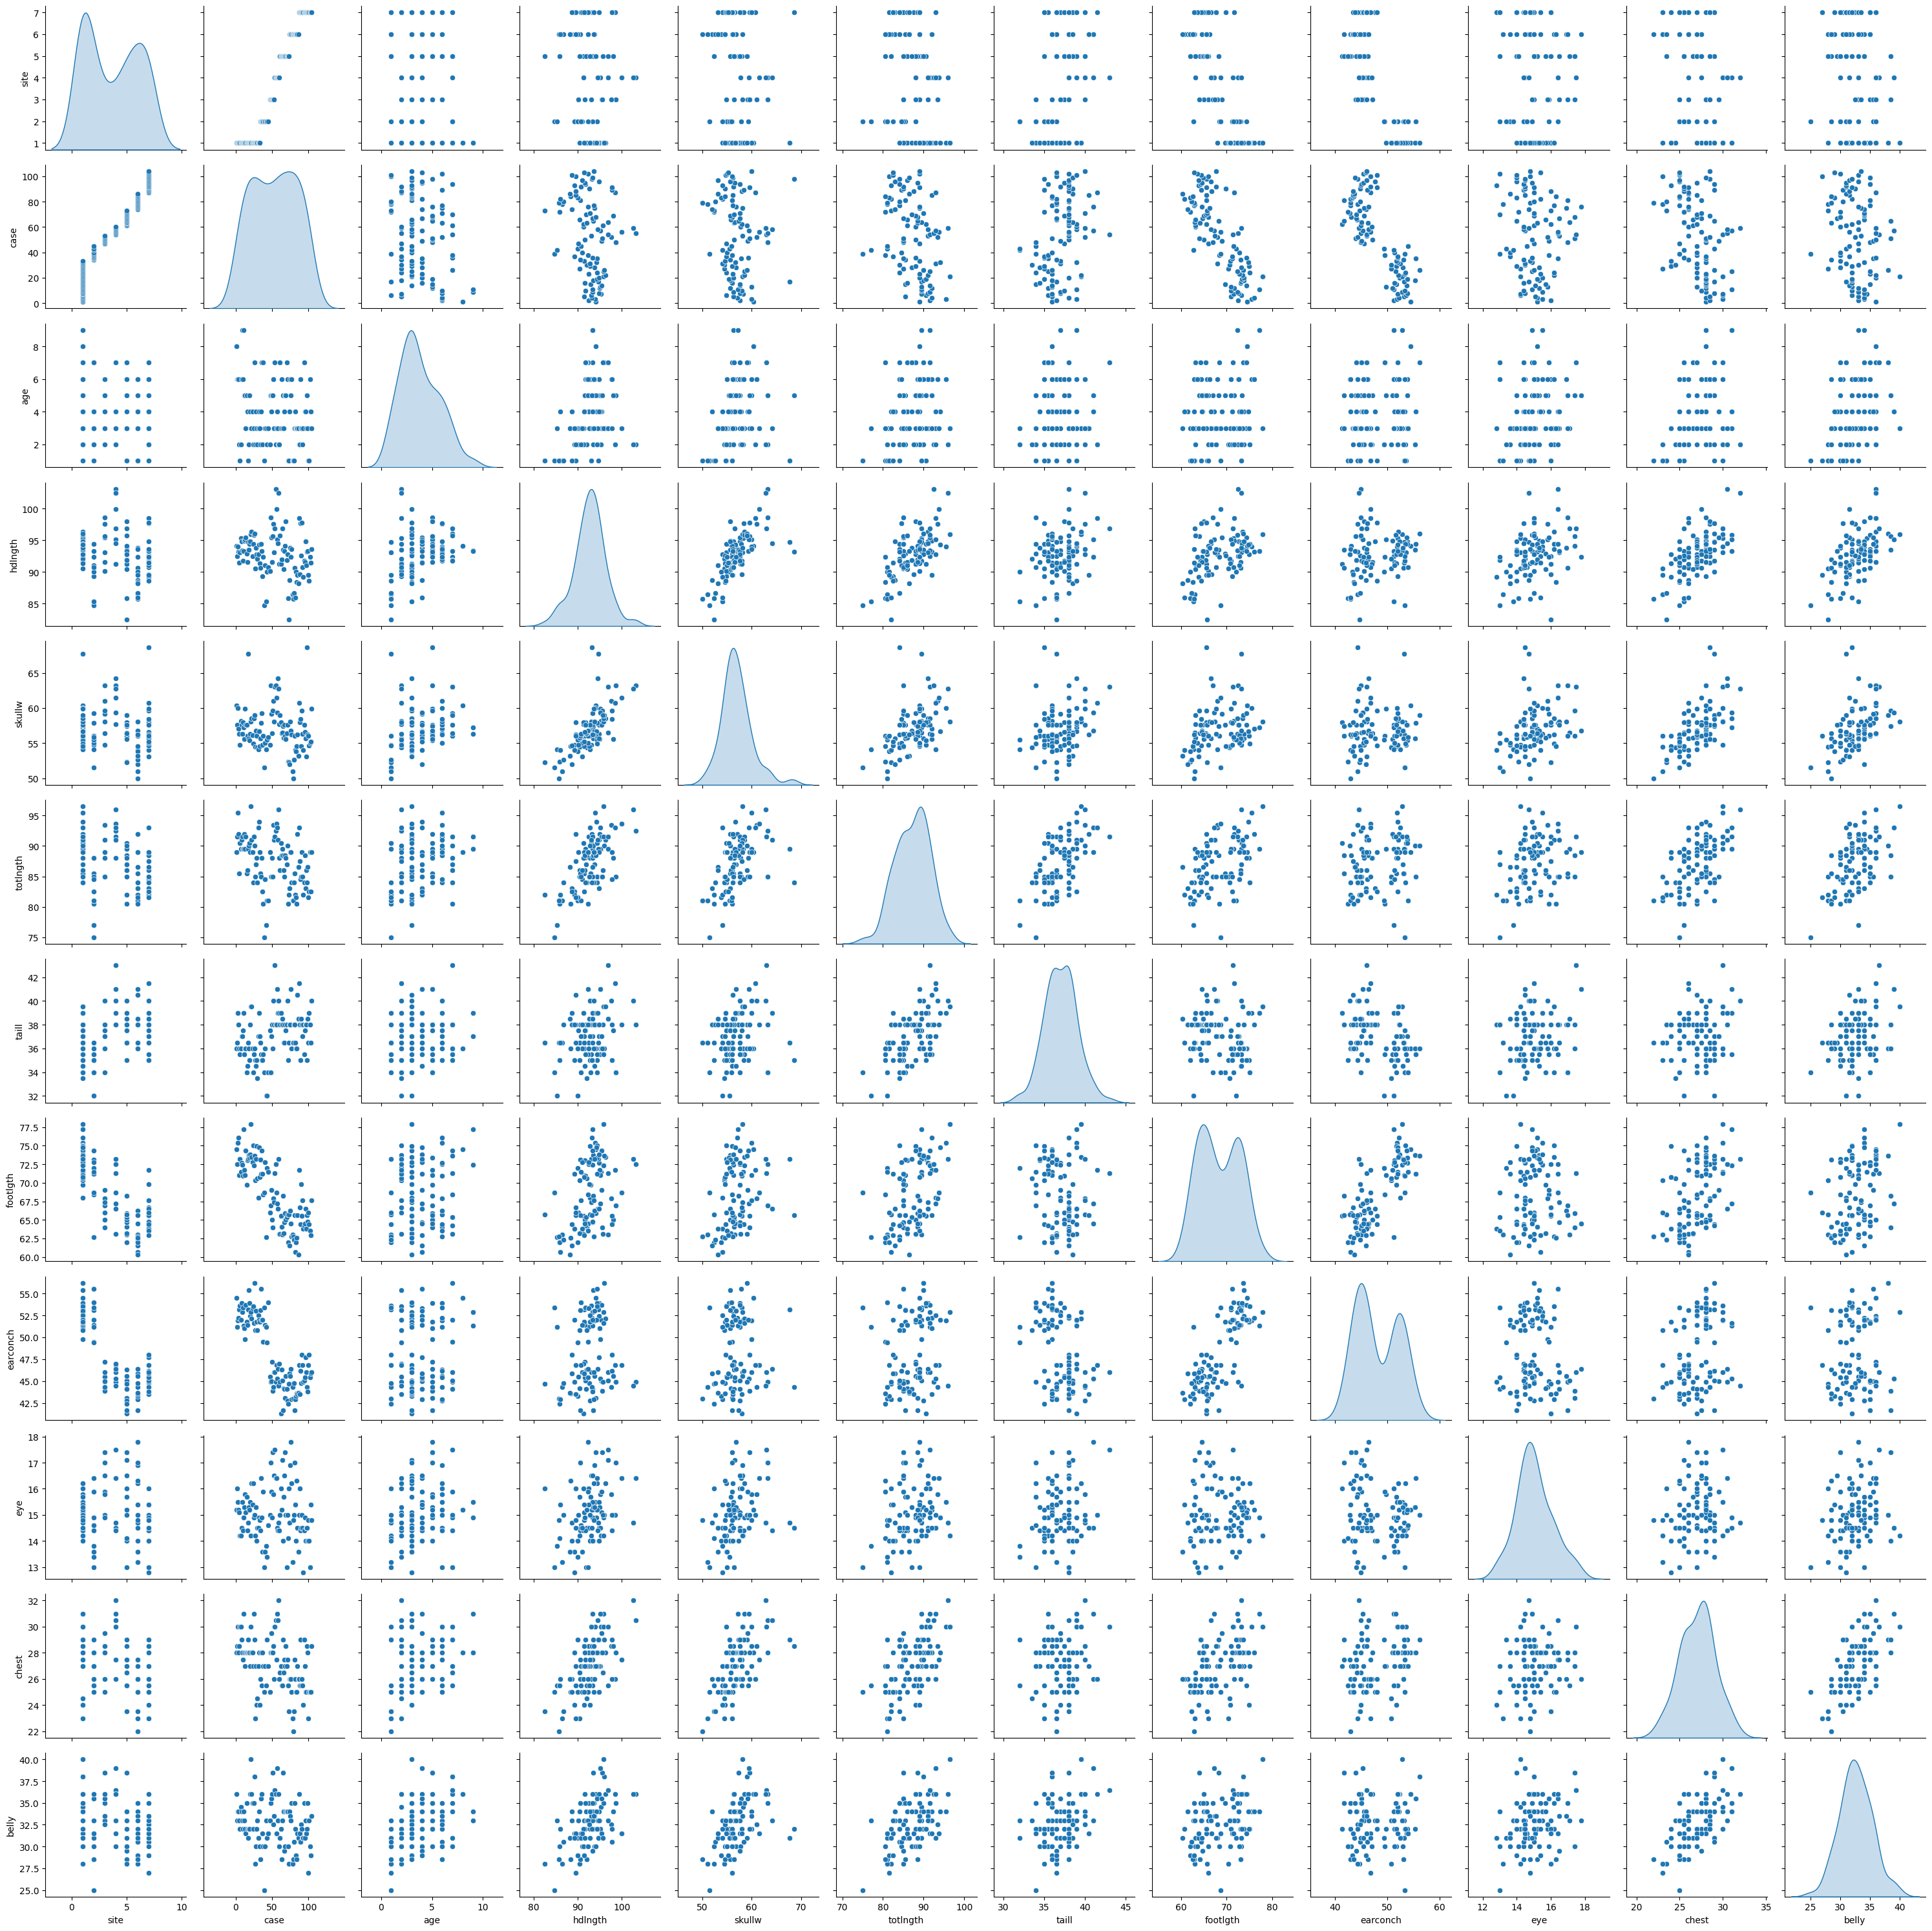

In [8]:
#scatter plots for all features. Tagret variable — age.
sns.pairplot(df[numerical], diag_kind='kde')
plt.tight_layout()
plt.show()

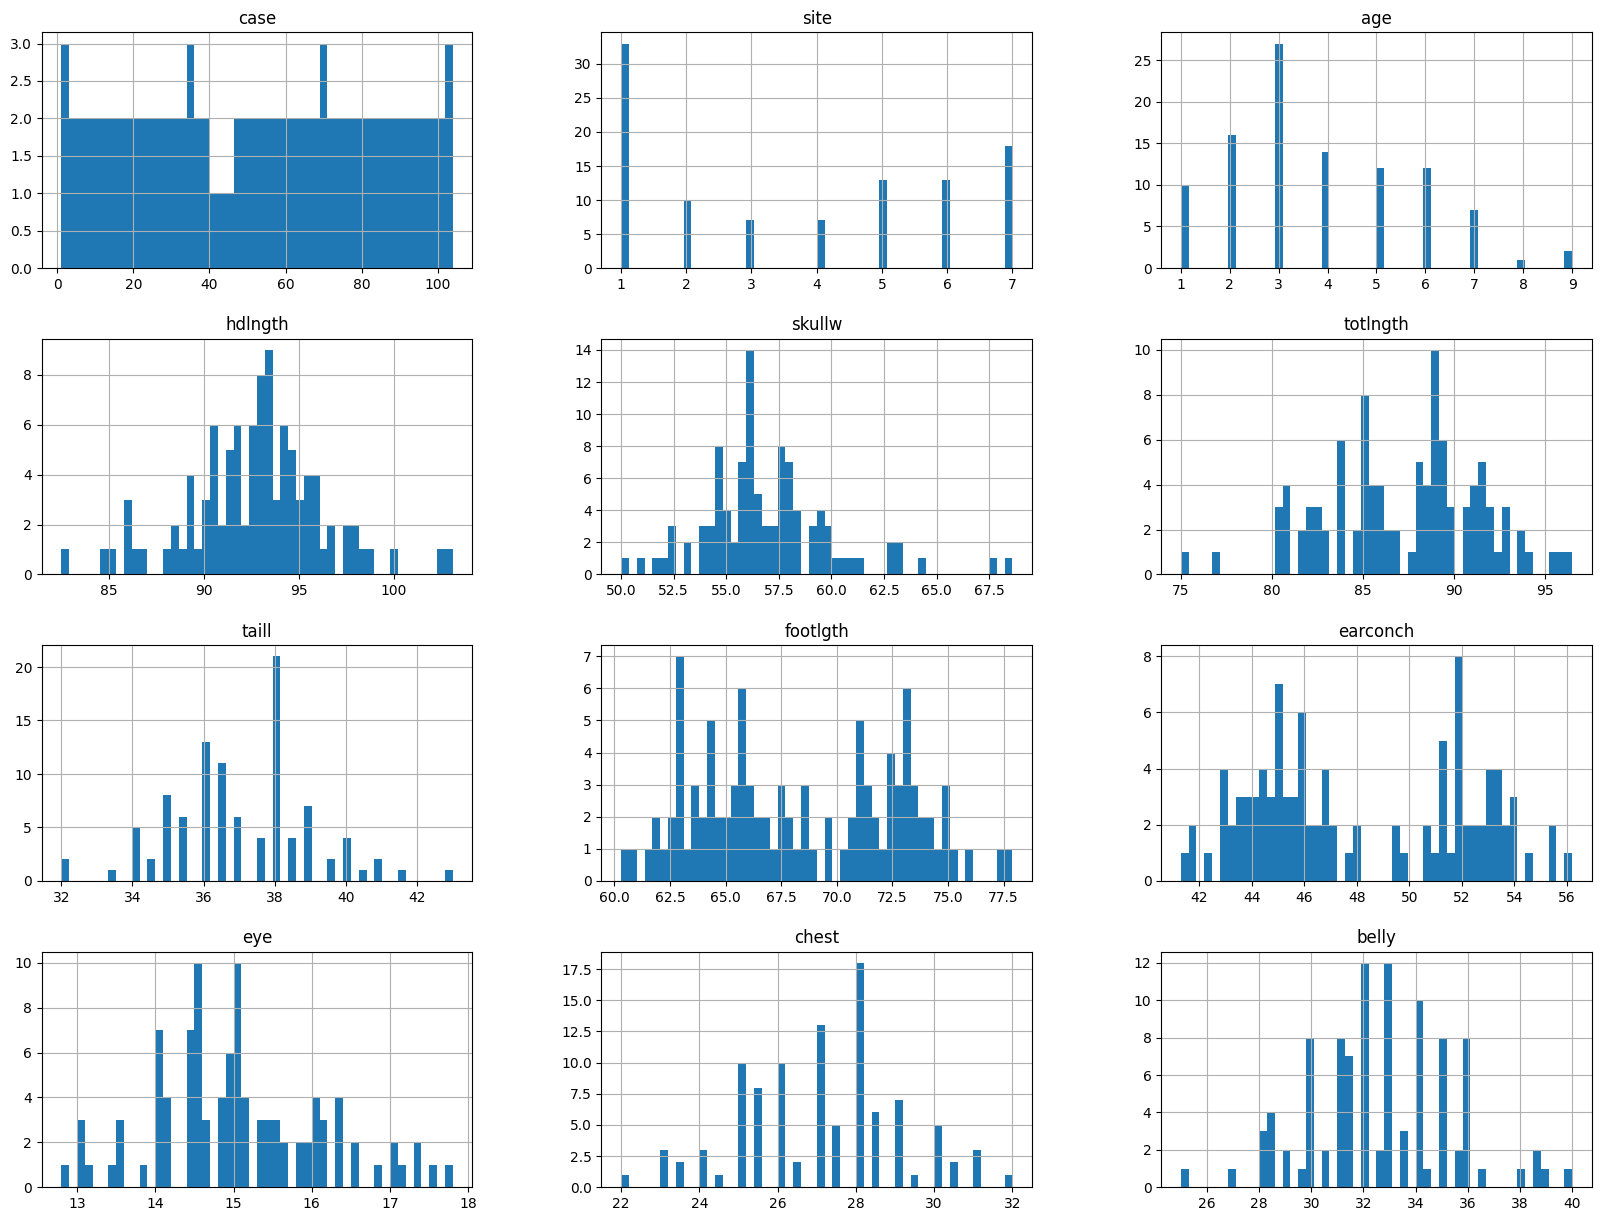

In [9]:
#bar charts for features
df.hist(bins = 50, figsize=(20,15))
plt.show()

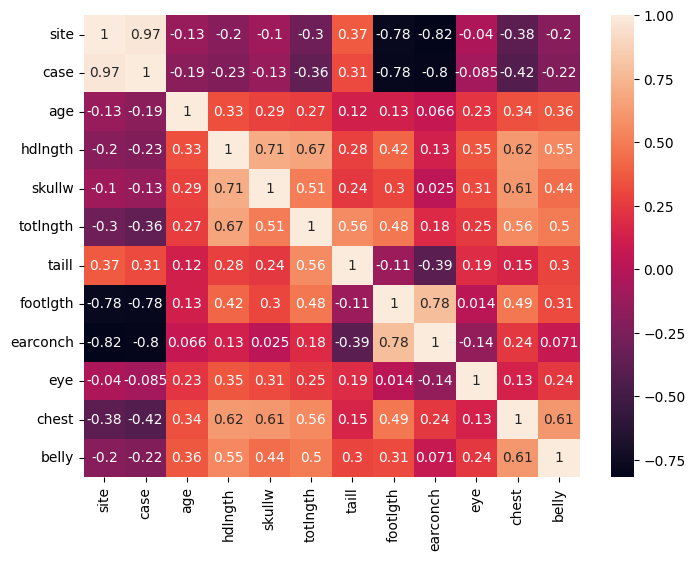

In [10]:
#correlation between numerical features
cm = df[numerical].corr()
hm = sns.heatmap(cm, annot=True, yticklabels=numerical,xticklabels=numerical)
hm.figure.set_size_inches(8,6)
plt.show()

In [11]:
#pipeline for categorical values
cat_pipeline = Pipeline([
    ('encoder', OrdinalEncoder())
])

#pipeline for numerical values: standardize features 
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ('cat', cat_pipeline, categorical),
    ('num', num_pipeline, numerical)
])

df_prepared = full_pipeline.fit_transform(df)

In [12]:
original_column_names = [c.replace("cat__","").replace("num__","") for c in full_pipeline.get_feature_names_out()]
df_prepared = pd.DataFrame(df_prepared, columns = original_column_names)
df_prepared.head()

,Pop,sex,site,case,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,0.0,1.0,-1.135075,-1.701469,2.192511,0.391091,1.114121,0.414441,-0.534944,1.389467,1.575748,0.141928,0.465334,1.238441
1,0.0,0.0,-1.135075,-1.668599,1.143015,-0.065889,0.207174,1.013103,-0.280089,0.934052,0.758956,0.901381,0.714004,0.133146
2,0.0,0.0,-1.135075,-1.635728,1.143015,0.362530,0.984557,1.970964,0.994189,1.594404,0.932215,0.426723,1.460016,0.501578
3,0.0,0.0,-1.135075,-1.602857,1.143015,0.134040,0.045219,1.132836,0.484478,1.753799,1.006469,0.141928,0.465334,0.501578
4,0.0,0.0,-1.135075,-1.569986,-0.955976,-0.351501,-0.213909,-0.423687,-0.534944,0.592490,1.253981,0.046996,0.714004,0.133146


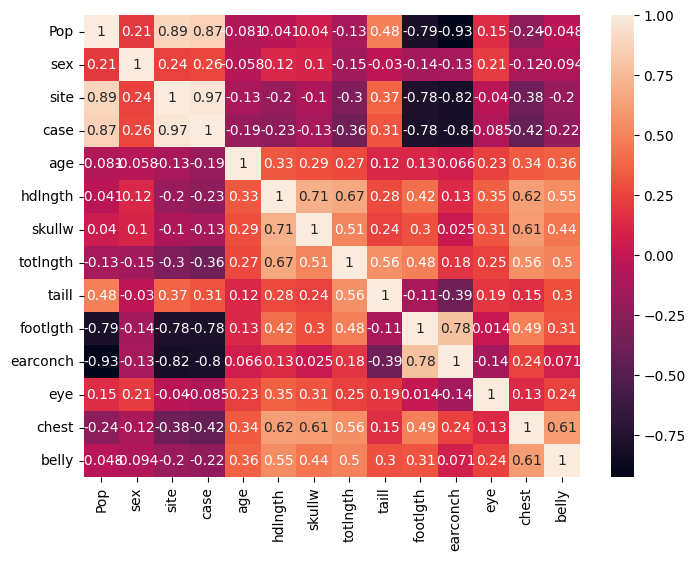

In [13]:
#correlation between all the features
cm = df_prepared.corr(numeric_only=True)
hm = sns.heatmap(cm, annot=True, yticklabels=original_column_names,xticklabels=original_column_names)
hm.figure.set_size_inches(8,6)
plt.show()

In [14]:
# since 'case' is just an ordinal number and 'Pop' and 'site' number is where
# every possum was trapped we consider these columns as irrelevant and delete them.
#
df_prepared = df_prepared.drop(columns = ['case','site','Pop'])
cm = df_prepared.corr(numeric_only=True)

In [15]:
df_prepared

,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1.0,2.192511,0.391091,1.114121,0.414441,-0.534944,1.389467,1.575748,0.141928,0.465334,1.238441
1,0.0,1.143015,-0.065889,0.207174,1.013103,-0.280089,0.934052,0.758956,0.901381,0.714004,0.133146
2,0.0,1.143015,0.362530,0.984557,1.970964,0.994189,1.594404,0.932215,0.426723,1.460016,0.501578
3,0.0,1.143015,0.134040,0.045219,1.132836,0.484478,1.753799,1.006469,0.141928,0.465334,0.501578
4,0.0,-0.955976,-0.351501,-0.213909,-0.423687,-0.534944,0.592490,1.253981,0.046996,0.714004,0.133146
...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,-1.480724,-0.922725,-0.311082,-1.381548,-0.280089,-0.546047,-0.330098,-0.237799,-2.021371,-2.077444
97,1.0,-1.480724,-1.179776,-0.732164,-1.142082,0.994189,-0.910379,-0.033083,-0.997253,-1.026689,0.133146
98,0.0,1.143015,-0.094450,-0.634991,0.414441,0.484478,-1.115316,-0.676616,-1.946570,-1.026689,-0.972149
99,1.0,0.093519,-0.351501,-0.570209,-1.142082,-0.280089,-1.251941,-0.552859,0.331791,-1.026689,-1.340580


In [16]:
#corellation between target value and all remaining the features 
cm['skullw'].sort_values(ascending=False)

skullw      1.000000
hdlngth     0.705901
chest       0.613842
totlngth    0.506382
belly       0.444216
eye         0.314319
footlgth    0.297197
age         0.285563
taill       0.241027
sex         0.104349
earconch    0.025293
Name: skullw, dtype: float64

In [17]:
#dividing data into features and tagret value
y = df_prepared['skullw']
X = df_prepared.drop(columns = ['skullw'])
X

,sex,age,hdlngth,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1.0,2.192511,0.391091,0.414441,-0.534944,1.389467,1.575748,0.141928,0.465334,1.238441
1,0.0,1.143015,-0.065889,1.013103,-0.280089,0.934052,0.758956,0.901381,0.714004,0.133146
2,0.0,1.143015,0.362530,1.970964,0.994189,1.594404,0.932215,0.426723,1.460016,0.501578
3,0.0,1.143015,0.134040,1.132836,0.484478,1.753799,1.006469,0.141928,0.465334,0.501578
4,0.0,-0.955976,-0.351501,-0.423687,-0.534944,0.592490,1.253981,0.046996,0.714004,0.133146
...,...,...,...,...,...,...,...,...,...,...
96,1.0,-1.480724,-0.922725,-1.381548,-0.280089,-0.546047,-0.330098,-0.237799,-2.021371,-2.077444
97,1.0,-1.480724,-1.179776,-1.142082,0.994189,-0.910379,-0.033083,-0.997253,-1.026689,0.133146
98,0.0,1.143015,-0.094450,0.414441,0.484478,-1.115316,-0.676616,-1.946570,-1.026689,-0.972149
99,1.0,0.093519,-0.351501,-1.142082,-0.280089,-1.251941,-0.552859,0.331791,-1.026689,-1.340580


In [18]:
#splitting prepared data into train and test samples.
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(80, 10) (21, 10)
(80,) (21,)


<p style="font-size: 26px">2. Custom Algorithm</p>

In [19]:
#custom regressor. Built from Logistic Regression class. Implies that data is already prepared (cleaned, normalized etc)

class LinearRegressionCustom:
    """Linear Regression Classifier."""
    def __init__(self, 
                 learning_rate=0.01, 
                 max_iter=1000,
                 tol=1e-4,
                 verbose=False):
        
        """Initialize Logistic Regression Classifier.
        
        Args:
            learning_rate (float): Learning rate for gradient descent.
            max_iter (int): Maximum number of iterations for gradient descent.
            tol (float): Tolerance for gradient descent.
            verbose (bool): Whether to print cost at each 100th iteration.
        """
        
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose

    def add_intercept(self, X):
        """Add intercept term to the data.
        
        Args:
            X (array): Data to add intercept term.
        
        Returns:
            array: Data with intercept term."""
        
        m = X.shape[0]
        ones = np.ones((m, 1))
        X_new = np.column_stack((ones, X))
        return X_new
    
    def hypothesis(self, X, theta):
        """Hypothesis function.
        
        Args:
            X (array): Data.
            theta (array): Parameters.
        
        Returns:
            array: Output of hypothesis function."""
        
        return np.dot(X,theta)

    def cost_function(self, X, y, theta):
        """Cost function.
        
        Args:
            X (array): Data.
            y (array): Target.
            theta (array): Parameters.
            
        Returns:
            float: Cost of hypothesis function."""
        m = X.shape[0]
        if m == 0:
            return None
        A = self.hypothesis(X,theta)
        cost = np.sum(np.power((A - y), 2))/(2*m)
        return cost

    def gradient(self, X, y, theta):
        """Gradient of cost function.
        
        Args:
            X (array): Data.
            y (array): Target.
            theta (array): Parameters.
            
        Returns:
            array: Gradient of cost function."""
        
        m = X.shape[0]
        if m == 0:
            return None

        gradient = np.dot(self.hypothesis(X,theta) - y,X)/m
        return gradient

    def gradient_descent(self, X, y, theta):
        """Gradient descent algorithm.

        Args:
            X (array): Data.
            y (array): Target.
            theta (array): Parameters.
        
        Returns:
            tuple: Tuple containing parameters and costs."""
        costs = []
        J = self.cost_function(X, y, theta)
        costs.append(J)

        if self.verbose:
            print(f"Iteration 0 Cost: {J}")

        for i in range(1, self.max_iter + 1):

            grad = self.gradient(X,y,theta)
            theta = theta - self.learning_rate*grad
            cost = self.cost_function(X,y,theta)
            
            costs.append(cost)

            if i % 100 == 0 and self.verbose:
                print(f"Iteration {i} Cost: {cost}")

            if np.abs(costs[i] - costs[i - 1]) < self.tol:
                print(f"Converged at iteration {i}")
                break

        return theta, costs
    
    def fit(self, X, y):
        """Fit the model.

        Args:
            X (array): Data.
            y (array): Target."""
        
        X_new = self.add_intercept(X)

        self.theta = np.zeros(X_new.shape[1])
        self.theta, self.costs = self.gradient_descent(X_new, y, self.theta)

    def predict(self, X):
        """Predict the target.

        Args:
            X (array): Data.

        Returns:
            array: Predicted target."""
        X_new = self.add_intercept(X)

        return self.hypothesis(X_new, self.theta)
    
    def get_theta(self):
        return self.theta

<p style="font-size: 20px">2. Training</p>

In [20]:
res = np.array([['learn_rate','MAE','MSE','RMSE','R']])
for i in [0.1, 0.05, 0.01, 0.005, 0.3,0.034,0.00912,0.0123]:
    
    lr = LinearRegressionCustom(learning_rate=i, max_iter=1000, tol=1e-4, verbose=False)
    lr.fit(X_train, y_train)
    y_test_pred = lr.predict(X_test)

    rel_diff = np.divide(y_test - y_test_pred, y_test)

    AE = np.sum(np.abs(y_test - y_test_pred))
    MAE = np.divide(AE, y_test.shape)

    SE = np.sum(np.power(y_test - y_test_pred, 2)) 
    MSE = np.divide(SE, y_test.shape)

    RMSE = np.sqrt(MSE)
    
    R = 1 - np.divide(np.sum(np.power(y_test - y_test_pred,2)), np.sum(np.power(y_test - y_test.mean(),2)))
    
    res = np.append(res, [[i,MAE[0],MSE[0],RMSE[0],R]], axis = 0)
    
    #res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred, 'rel_err' : rel_diff})
#     print("Learning rate =", i)
#     print('MAE =', MAE)
#     print('MSE =', MSE)
#     print('RMSE =', RMSE)
#     print('R =', R)
#     print()
pd.DataFrame(res[1:], columns = res[0])

Converged at iteration 47
Converged at iteration 76
Converged at iteration 189
Converged at iteration 230
Converged at iteration 21
Converged at iteration 98
Converged at iteration 196
Converged at iteration 173


,learn_rate,MAE,MSE,RMSE,R
0,0.1,0.4447075149051089,0.312387876170067,0.5589166987754678,0.6238724209753508
1,0.05,0.4437050149436025,0.3124710717130245,0.5589911195296617,0.6237722501923426
2,0.01,0.4469289199957249,0.3240895845980195,0.5692886654396164,0.6097830929405395
3,0.005,0.4607037362479643,0.3421543367585435,0.5849396009491438,0.5880324040882002
4,0.3,0.4460844383045355,0.3138239180970531,0.5601998911969308,0.6221433686830617
5,0.034,0.4430596611605902,0.3132274024145151,0.5596672247099298,0.622861597579375
6,0.00912,0.4479636666542238,0.32579725582783275,0.5707865238667016,0.6077269880323899
7,0.0123,0.44495710559584356,0.3208029162460406,0.5663946647400915,0.6137403739510667


In [21]:
lr_scikit = LinearRegression()

lr_scikit.fit(X_train, y_train)
y_test_pred = lr_scikit.predict(X_test)

rel_diff = np.divide(y_test - y_test_pred, y_test)

AE = np.sum(np.abs(y_test - y_test_pred))
MAE = np.divide(AE, y_test.shape)

SE = np.sum(np.power(y_test - y_test_pred, 2)) 
MSE = np.divide(SE, y_test.shape)

RMSE = np.sqrt(MSE)

res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred, 'rel_err' : rel_diff})

print('MAE =', MAE)
print('MSE =', MSE)
print('RMSE =', RMSE)

MAE = [0.45331206]
MSE = [0.31767451]
RMSE = [0.56362622]
